In [1]:
#Imports
import pandas as pd
from IPython.display import display, Markdown as md

import seaborn as sns
import matplotlib.pyplot as plt

Carga de los datos

In [2]:
cons = pd.read_csv("input/TNTH/cons.csv", parse_dates=["con_start", "con_end"], encoding='ISO-8859-1')
mats = pd.read_csv("input/TNTH/mats.csv", parse_dates=["release_date"], encoding='ISO-8859-1')
prog = pd.read_csv("input/TNTH/prog.csv", parse_dates=["prog_start"], encoding='ISO-8859-1')

Observamos las primeras filas para comenzar a conocer los datos.

In [3]:
display(cons.head())
display(mats.head())
display(prog.head())

,con_code,con_start,con_end,mat_code,total_runs,total_reps,con_freq,network_name
0,8017,2009-12-01,2011-11-30,129965,10,1,48,TNTLA
1,8017,2009-11-01,2011-10-31,129968,10,1,48,TNTLA
2,8017,2010-04-01,2012-03-31,1500,10,1,48,TNTLA
3,8017,2010-06-30,2012-06-29,129970,10,1,48,TNTLA
4,8017,2010-03-31,2012-03-30,129972,10,1,48,TNTLA


,mat_code,anio_prod,anio_cat,clasif,mat_duration,mat_type,genres,mat_name,release_date,imdb_rating,imdb_votes,boxoffice,mmr_clasificacion,country
0,137134,2001.0,2000s,NaN,98,LARGOMETRAJE,COMEDIA,WHAT'S THE WORST THAT COULD HAPPEN?,2009-09-01,5.4,11791.0,NaN,ATP,TNT ARG
1,144926,2009.0,2000s,4.0,109,LARGOMETRAJE,DRAMA,MY SISTER'S KEEPER,2017-03-01,7.4,69013.0,49200230.0,ATP,TNT ARG
2,136871,1999.0,1990s,NaN,146,LARGOMETRAJE,DRAMA,ANGELA'S ASHES,2008-03-01,7.3,16229.0,NaN,SAM 13,TNT ARG
3,129994,1990.0,1990s,NaN,115,LARGOMETRAJE,DRAMA - SUSPENSO,MILLER'S CROSSING,2009-05-01,7.9,97127.0,NaN,SC,TNT ARG
4,147724,2011.0,2010s,4.0,90,LARGOMETRAJE,COMEDIA,OUR IDIOT BROTHER,2016-05-15,6.4,71679.0,24816118.0,ATP,TNT ARG


,prog_start,prog_name,prog_duration,mat_code,con_code,run_count,rep_count,Feed,rating,ppp_code
0,2019-10-17 00:00:00,TNT MOVIE,120.0,NaN,NaN,0.0,NaN,TNTH,NaN,7697526
1,2018-09-07 03:10:47,TNT MOVIE,109.0,130571.0,951632.0,4.0,NaN,TNTH,0.02,6881432
2,2018-06-14 12:49:30,TNT MOVIE,124.0,2107037.0,948072.0,4.0,1.0,TNTH,0.13,6880250
3,2019-12-19 18:00:00,NON-BRANDED TNT MEGAFILM,120.0,NaN,NaN,0.0,NaN,TNTH,NaN,7679289
4,2018-04-17 04:20:04,TNT MOVIE,100.0,145190.0,956872.0,2.0,NaN,TNTH,0.01,7194423


Nos fijamos el tipo de dato de cada columna y la cantidad de valores nulos.

In [4]:
display(cons.info())
display(mats.info())
display(prog.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12549 entries, 0 to 12548
Data columns (total 8 columns):
con_code        12549 non-null int64
con_start       12549 non-null datetime64[ns]
con_end         12549 non-null datetime64[ns]
mat_code        12549 non-null int64
total_runs      12549 non-null int64
total_reps      12549 non-null int64
con_freq        12549 non-null int64
network_name    12549 non-null object
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 784.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 0 to 3418
Data columns (total 14 columns):
mat_code             3419 non-null int64
anio_prod            3413 non-null float64
anio_cat             3419 non-null object
clasif               2460 non-null float64
mat_duration         3419 non-null int64
mat_type             3419 non-null object
genres               3419 non-null object
mat_name             3419 non-null object
release_date         3419 non-null datetime64[ns]
imdb_rating          2868 non-null float64
imdb_votes           2867 non-null float64
boxoffice            1553 non-null float64
mmr_clasificacion    3419 non-null object
country              3419 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 374.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15446 entries, 0 to 15445
Data columns (total 10 columns):
prog_start       15446 non-null datetime64[ns]
prog_name        15446 non-null object
prog_duration    15446 non-null float64
mat_code         11699 non-null float64
con_code         11459 non-null float64
run_count        15446 non-null float64
rep_count        3835 non-null float64
Feed             15446 non-null object
rating           10617 non-null float64
ppp_code         15446 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.2+ MB


None

Observamos que el dataset 'cons' no tiene valores nulos. 

El dataset 'mats' tiene valores nulos en las columnas: "anio_prod" (unicamente 6 valores), "clasif", "imdb_rating", 
"imdb_votes" y "box_office".

El dataset 'prog' tiene valores nulos en las columnas: "mat_code", "con_code", "rep_count" y "rating". Si la programacion
tiene mat_code = null, significa que es un espacio televisivo vacio?
    

Miramos las estadísticas de cada columna, para tener una mejor idea de los datos con los que estamos trabajando.

In [5]:
display(cons.describe(include="all")) 
display(mats.describe(include="all")) 
display(prog.describe(include="all"))

,con_code,con_start,con_end,mat_code,total_runs,total_reps,con_freq,network_name
count,12549.000000,12549,12549,1.254900e+04,12549.000000,12549.000000,12549.000000,12549
unique,NaN,1412,1531,NaN,NaN,NaN,NaN,1
top,NaN,2014-12-01 00:00:00,2020-10-10 00:00:00,NaN,NaN,NaN,NaN,TNTLA
freq,NaN,1153,1025,NaN,NaN,NaN,NaN,12549
first,NaN,2006-10-01 00:00:00,2008-02-26 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-02-01 00:00:00,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,913061.793211,NaN,NaN,7.338335e+05,282.863654,564.183361,24.751614,NaN
std,163325.961051,NaN,NaN,9.078355e+05,332.309847,494.253368,4.352484,NaN
min,8017.000000,NaN,NaN,5.460000e+02,1.000000,0.000000,24.000000,NaN
25%,935312.000000,NaN,NaN,1.401290e+05,12.000000,1.000000,24.000000,NaN


,mat_code,anio_prod,anio_cat,clasif,mat_duration,mat_type,genres,mat_name,release_date,imdb_rating,imdb_votes,boxoffice,mmr_clasificacion,country
count,3.419000e+03,3413.000000,3419,2460.000000,3419.000000,3419,3419,3419,3419,2868.000000,2.867000e+03,1.553000e+03,3419,3419
unique,NaN,NaN,6,NaN,NaN,1,366,3403,636,NaN,NaN,NaN,5,1
top,NaN,NaN,2000s,NaN,NaN,LARGOMETRAJE,COMEDIA,CONSPIRACY,2010-01-01 00:00:00,NaN,NaN,NaN,ATP,TNT ARG
freq,NaN,NaN,1699,NaN,NaN,3419,339,2,220,NaN,NaN,NaN,2326,3419
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,3.018041e+05,2002.024319,NaN,3.976829,104.352442,NaN,NaN,NaN,NaN,6.288215,7.011651e+04,6.823762e+07,NaN,NaN
std,5.480353e+05,9.933350,NaN,0.253226,25.783942,NaN,NaN,NaN,NaN,1.102289,1.222301e+05,7.596976e+07,NaN,NaN
min,5.460000e+02,1941.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1.300000,5.000000e+00,5.250000e+02,NaN,NaN
25%,1.362450e+05,1998.000000,NaN,4.000000,92.000000,NaN,NaN,NaN,NaN,5.675000,4.094500e+03,1.831986e+07,NaN,NaN


,prog_start,prog_name,prog_duration,mat_code,con_code,run_count,rep_count,Feed,rating,ppp_code
count,15446,15446,15446.000000,1.169900e+04,11459.000000,15446.000000,3835.000000,15446,10617.000000,1.544600e+04
unique,13908,138,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,2017-09-02 06:00:00,TNT MOVIE,NaN,NaN,NaN,NaN,NaN,TNTH,NaN,NaN
freq,4,7479,NaN,NaN,NaN,NaN,NaN,15446,NaN,NaN
first,2017-01-01 00:14:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,111.985627,1.096457e+06,951531.214940,7.306811,1.003651,NaN,0.233930,6.923920e+06
std,NaN,NaN,41.089616,9.909106e+05,9416.936984,8.212589,0.072133,NaN,0.237498,5.733419e+05
min,NaN,NaN,1.000000,1.104000e+03,151020.000000,0.000000,1.000000,NaN,0.000000,5.519690e+06
25%,NaN,NaN,100.000000,1.451170e+05,948352.000000,0.000000,1.000000,NaN,0.050000,6.295211e+06


Observaciones: 
* mat_type tiene un unico valor (LARGOMETRAJE).
* Se podria eliminar feed tiene un unico valor (TNTH)
* Los campos que son fechas tienen formato distinto entre si
* Los vacios de imdb_rating y imdb_count deben coincidir
* Los generos son compuestos. Se podria codificar la variable categorica


Mostramos el codigo de los unicos 6 campos sin anio_prod

In [6]:
mats.loc[mats.anio_prod.isnull(),"mat_code"]


179     140084
974     130600
1178    131674
1572    131730
2258    140089
3071    143350
Name: mat_code, dtype: int64

Codificamos las variables categoricas. Habria que tratar de reducir la cantidad

In [7]:
mats.genres.str.get_dummies(sep=' - ')

,ACCIÓN,ANIMACIÓN,AVENTURAS,BIOGRAFÍA,BÉLICA,CATÁSTROFE,CIENCIA FICCIÓN,COMEDIA,DEPORTE,DOCUMENTAL,...,GENRE_N/A,INFANTIL,MUSICAL,MÚSICA,POLICIAL,ROMANCE,SUSPENSO,TERROR,WESTERN,ÉPICA
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Chequeamos que los vacios de imdb_rating y imdb_votes sean los mismos.

In [8]:
display(mats.loc[(mats.imdb_rating.isnull()) & (mats.imdb_votes.isnull())  ,['imdb_rating', 'imdb_votes']])

,imdb_rating,imdb_votes
5,NaN,NaN
6,NaN,NaN
21,NaN,NaN
26,NaN,NaN
30,NaN,NaN
42,NaN,NaN
52,NaN,NaN
56,NaN,NaN
61,NaN,NaN
62,NaN,NaN


In [9]:
#display(mats.loc[mats.imdb_rating.isnull()  ,['imdb_rating', 'imdb_votes']])
#display(mats.loc[mats.imdb_votes.isnull()  ,['imdb_rating', 'imdb_votes']])

#Hay 551 coincidencias, pero imdb_votes tiene 552 nulos:
mats.loc[(mats.imdb_rating.notnull()) & (mats.imdb_votes.isnull())  ,['imdb_rating', 'imdb_votes']]


,imdb_rating,imdb_votes
3219,8.0,NaN


Para obtener los reviews faltantes API https://imdbpy.sourceforge.io/support.html

Convertimos las fechas de tipo object a datetime

In [10]:
cons.loc[:, "con_start"] = pd.to_datetime(cons["con_start"])
cons.loc[:, "con_end"] = pd.to_datetime(cons["con_end"])
mats.loc[:, "release_date"] = pd.to_datetime(mats["release_date"])

display(cons.head())
display(mats.head())

,con_code,con_start,con_end,mat_code,total_runs,total_reps,con_freq,network_name
0,8017,2009-12-01,2011-11-30,129965,10,1,48,TNTLA
1,8017,2009-11-01,2011-10-31,129968,10,1,48,TNTLA
2,8017,2010-04-01,2012-03-31,1500,10,1,48,TNTLA
3,8017,2010-06-30,2012-06-29,129970,10,1,48,TNTLA
4,8017,2010-03-31,2012-03-30,129972,10,1,48,TNTLA


,mat_code,anio_prod,anio_cat,clasif,mat_duration,mat_type,genres,mat_name,release_date,imdb_rating,imdb_votes,boxoffice,mmr_clasificacion,country
0,137134,2001.0,2000s,NaN,98,LARGOMETRAJE,COMEDIA,WHAT'S THE WORST THAT COULD HAPPEN?,2009-09-01,5.4,11791.0,NaN,ATP,TNT ARG
1,144926,2009.0,2000s,4.0,109,LARGOMETRAJE,DRAMA,MY SISTER'S KEEPER,2017-03-01,7.4,69013.0,49200230.0,ATP,TNT ARG
2,136871,1999.0,1990s,NaN,146,LARGOMETRAJE,DRAMA,ANGELA'S ASHES,2008-03-01,7.3,16229.0,NaN,SAM 13,TNT ARG
3,129994,1990.0,1990s,NaN,115,LARGOMETRAJE,DRAMA - SUSPENSO,MILLER'S CROSSING,2009-05-01,7.9,97127.0,NaN,SC,TNT ARG
4,147724,2011.0,2010s,4.0,90,LARGOMETRAJE,COMEDIA,OUR IDIOT BROTHER,2016-05-15,6.4,71679.0,24816118.0,ATP,TNT ARG


In [11]:
# Puede haber outliers en las duraciones de los programas y de los materiales

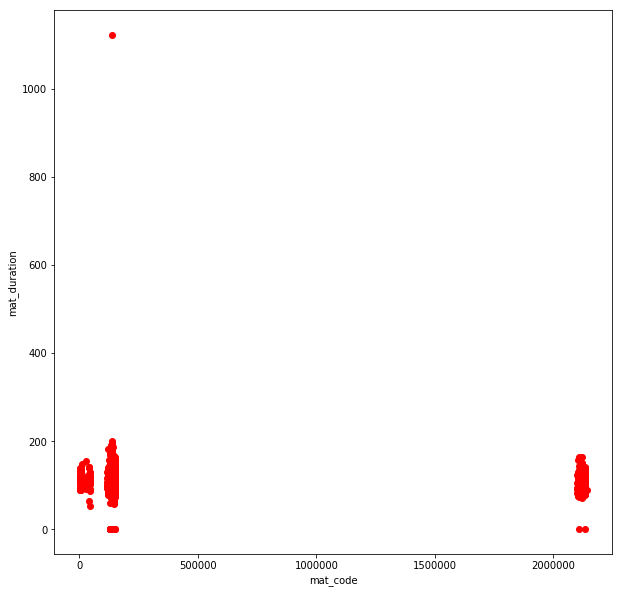

In [12]:
# Config
%matplotlib inline
#pd.options.display.max_columns = None
#plt.figure(figsize=(10, 10));
fig, ax = plt.subplots(figsize=(10,10))

#ax.scatter(mats['mat_code'], mats['mat_duration'])
ax.set_xlabel('mat_code')
ax.set_ylabel('mat_duration')

plt.plot(mats["mat_code"], mats["mat_duration"], 'ro')
plt.show()

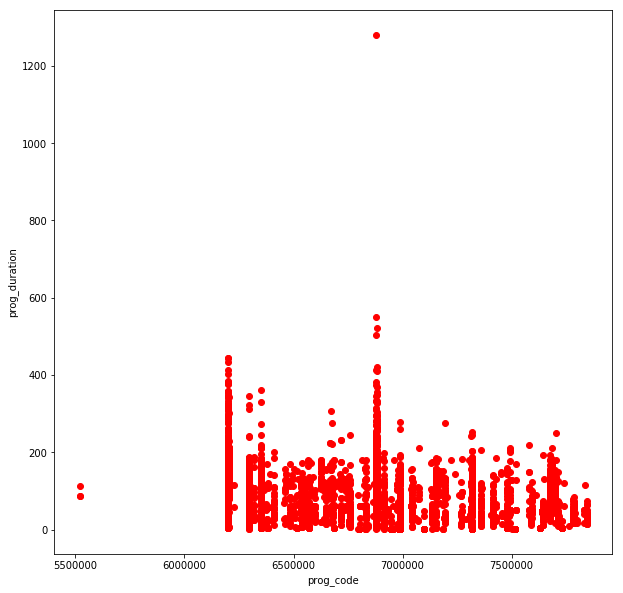

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

#ax.scatter(mats['mat_code'], mats['mat_duration'])
ax.set_xlabel('prog_code')
ax.set_ylabel('prog_duration')

plt.plot(prog["ppp_code"], prog["prog_duration"], 'ro')
plt.show()

In [14]:
mats[mats["mat_duration"] > 1000]

,mat_code,anio_prod,anio_cat,clasif,mat_duration,mat_type,genres,mat_name,release_date,imdb_rating,imdb_votes,boxoffice,mmr_clasificacion,country
2963,135551,1989.0,1980s,NaN,1122,LARGOMETRAJE,COMEDIA,LOVERBOY,2010-01-01,5.9,4969.0,NaN,ATP,TNT ARG
